In [41]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [43]:
from keras.datasets import mnist

In [44]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [45]:
len(x_train)

60000

In [46]:
len(x_test)

10000

In [47]:
X = x_train[87]

In [48]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [49]:
X.shape

(28, 28)

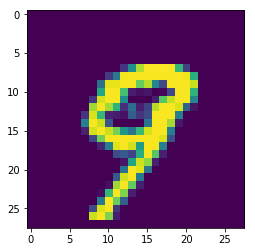

In [50]:
plt.imshow(X)

In [51]:
x_train.shape

(60000, 28, 28)

In [52]:
x_test.shape

(10000, 28, 28)

In [53]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [54]:
from keras.utils import np_utils

In [55]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [56]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [59]:
model = Sequential()

In [61]:
model.add(Dense(4,input_dim = 784))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [62]:
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [63]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [65]:
model.compile(loss = 'mse', optimizer=SGD(lr = 0.087), metrics = ['accuracy'])

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [68]:
784*4 + 4

3140

In [69]:
4*2 + 2

10

In [70]:
2*10 + 10

30

In [75]:
model.fit(x_train, y_train, batch_size = 100, epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0677 - acc: 0.3894
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0674 - acc: 0.3897
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0671 - acc: 0.3903
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0670 - acc: 0.3913
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0667 - acc: 0.3905
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0665 - acc: 0.3901
Epoch 7/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0664 - acc: 0.3902
Epoch 8/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0662 - acc: 0.3888
Epoch 9/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0659 - acc: 0.3886
Epoch 10/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0658 - acc: 0.3897

In [76]:
predict = model.predict_classes(x_test)

In [77]:
predict

array([7, 0, 1, ..., 4, 4, 6])

In [78]:
def test(number):
    plt.imshow(x_test[number].reshape(28,28))
    print('神經網路判斷為：',predict[number])

神經網路判斷為： 1


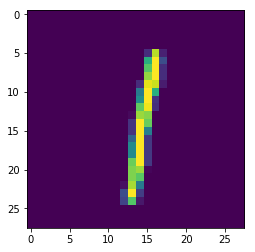

In [80]:
test(2519)

In [81]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 27us/step


In [82]:
print('loss:',score[0])
print('正確率',score[1])

loss: 0.06391271768808365
正確率 0.4221
